# Final Project - Hernan Szmajser
---

In [1]:
# Imports
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC # Supprt Vector Classifier
from sklearn.model_selection import GridSearchCV
import pickle

## EDA

In [2]:
# Load CSV File
#df = pd.read_csv('./openMeteoProject/Data/quebec_hourly_weather_2017_2024.csv')
df = pd.read_csv('quebec_hourly_weather_2017_2024.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78888 entries, 0 to 78887
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        78888 non-null  object 
 1   temperature_2m              33120 non-null  float64
 2   weather_code                33117 non-null  float64
 3   relative_humidity_2m        33120 non-null  float64
 4   dew_point_2m                33120 non-null  float64
 5   apparent_temperature        33120 non-null  float64
 6   precipitation_probability   0 non-null      float64
 7   precipitation               33119 non-null  float64
 8   pressure_msl                33120 non-null  float64
 9   cloud_cover                 33119 non-null  float64
 10  surface_pressure            33120 non-null  float64
 11  cloud_cover_low             33119 non-null  float64
 12  cloud_cover_mid             33119 non-null  float64
 13  cloud_cover_high            331

In [4]:
df['weather_code'].isnull().sum()

45771

In [5]:
# Keep values not null with weather_code 
df = df[df['weather_code'].notnull()]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33117 entries, 45769 to 78887
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        33117 non-null  object 
 1   temperature_2m              33117 non-null  float64
 2   weather_code                33117 non-null  float64
 3   relative_humidity_2m        33117 non-null  float64
 4   dew_point_2m                33117 non-null  float64
 5   apparent_temperature        33117 non-null  float64
 6   precipitation_probability   0 non-null      float64
 7   precipitation               33117 non-null  float64
 8   pressure_msl                33117 non-null  float64
 9   cloud_cover                 33117 non-null  float64
 10  surface_pressure            33117 non-null  float64
 11  cloud_cover_low             33117 non-null  float64
 12  cloud_cover_mid             33117 non-null  float64
 13  cloud_cover_high            3311

In [7]:
# Drop precipitation_probability - no values
df = df.drop(columns=["precipitation_probability"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33117 entries, 45769 to 78887
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        33117 non-null  object 
 1   temperature_2m              33117 non-null  float64
 2   weather_code                33117 non-null  float64
 3   relative_humidity_2m        33117 non-null  float64
 4   dew_point_2m                33117 non-null  float64
 5   apparent_temperature        33117 non-null  float64
 6   precipitation               33117 non-null  float64
 7   pressure_msl                33117 non-null  float64
 8   cloud_cover                 33117 non-null  float64
 9   surface_pressure            33117 non-null  float64
 10  cloud_cover_low             33117 non-null  float64
 11  cloud_cover_mid             33117 non-null  float64
 12  cloud_cover_high            33117 non-null  float64
 13  visibility                  3311

In [9]:
# Date Format
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [10]:
df.head()

,date,temperature_2m,weather_code,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,pressure_msl,cloud_cover,surface_pressure,...,soil_temperature_54cm,soil_moisture_0_to_1cm,soil_moisture_1_to_3cm,soil_moisture_3_to_9cm,soil_moisture_9_to_27cm,soil_moisture_27_to_81cm,hour,day,month,year
45769,2021-03-23 01:00:00+00:00,5.0085,3.0,83.0,2.360686,1.416253,0.0,1021.4,100.0,1016.64620,...,NaN,NaN,NaN,NaN,NaN,NaN,1,23,3,2021
45770,2021-03-23 02:00:00+00:00,4.7585,3.0,85.0,2.450528,1.150039,0.0,1021.4,100.0,1016.64210,...,NaN,NaN,NaN,NaN,NaN,NaN,2,23,3,2021
45771,2021-03-23 03:00:00+00:00,4.6585,3.0,85.0,2.352382,0.952538,0.0,1021.7,100.0,1016.93900,...,NaN,NaN,NaN,NaN,NaN,NaN,3,23,3,2021
45772,2021-03-23 04:00:00+00:00,3.9085,3.0,84.0,1.451004,0.210290,0.0,1021.8,88.0,1017.02545,...,NaN,NaN,NaN,NaN,NaN,NaN,4,23,3,2021
45773,2021-03-23 05:00:00+00:00,2.8085,1.0,86.0,0.698646,-0.826857,0.0,1022.0,26.0,1017.20575,...,NaN,NaN,NaN,NaN,NaN,NaN,5,23,3,2021


In [11]:
df['evapotranspiration'].head()

45769    0.0
45770    0.0
45771    0.0
45772    0.0
45773    0.0
Name: evapotranspiration, dtype: float64

In [12]:
df['evapotranspiration'].tail()

78883    0.0
78884    0.0
78885    0.0
78886    0.0
78887    0.0
Name: evapotranspiration, dtype: float64

In [13]:
df = df.drop(columns=["evapotranspiration"])

In [14]:
# National Centers for Environmental Information
# https://www.nodc.noaa.gov/archive/arc0021/0002199/1.1/data/0-data/HTML/WMO-CODE/WMO4677.HTM

<Axes: title={'center': 'Weather codes distribution'}, xlabel='weather_code'>

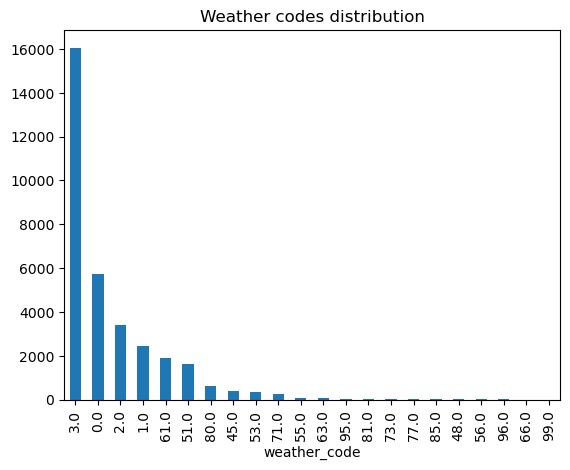

In [15]:
df['weather_code'].value_counts().plot(kind='bar', title='Weather codes distribution')

In [16]:
df.corr()

,date,temperature_2m,weather_code,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,pressure_msl,cloud_cover,surface_pressure,...,soil_temperature_54cm,soil_moisture_0_to_1cm,soil_moisture_1_to_3cm,soil_moisture_3_to_9cm,soil_moisture_9_to_27cm,soil_moisture_27_to_81cm,hour,day,month,year
date,1.000000,-0.012581,0.036820,0.154040,0.084860,0.021374,-0.014653,-0.063829,0.058720,-0.064076,...,0.301689,-0.170612,-0.170708,-0.171683,-0.175016,-0.182042,0.000553,0.009445,0.136327,0.966878
temperature_2m,-0.012581,1.000000,-0.117410,-0.599533,0.797173,0.989617,-0.001184,-0.072538,-0.126736,-0.059149,...,0.837337,-0.684827,-0.683235,-0.680962,-0.686127,-0.648290,0.123497,0.019595,0.082694,-0.033864
weather_code,0.036820,-0.117410,1.000000,0.298888,0.061646,-0.106824,0.406205,-0.269386,0.297106,-0.271185,...,-0.185015,0.340401,0.324320,0.282866,0.212243,0.148671,0.010844,0.013496,0.011877,0.033464
relative_humidity_2m,0.154040,-0.599533,0.298888,1.000000,-0.009301,-0.511694,0.135769,-0.105564,0.268813,-0.113650,...,-0.400333,0.499202,0.479128,0.439557,0.376245,0.251033,-0.202645,0.032654,0.147453,0.115513
dew_point_2m,0.084860,0.797173,0.061646,-0.009301,1.000000,0.849515,0.092080,-0.169255,0.043786,-0.158597,...,0.801454,-0.523360,-0.537246,-0.563962,-0.614919,-0.654486,0.008806,0.051638,0.199801,0.032902
apparent_temperature,0.021374,0.989617,-0.106824,-0.511694,0.849515,1.000000,0.007985,-0.060819,-0.122222,-0.047561,...,0.860914,-0.693786,-0.695047,-0.698049,-0.709799,-0.678822,0.104242,0.028402,0.109194,-0.006814
precipitation,-0.014653,-0.001184,0.406205,0.135769,0.092080,0.007985,1.000000,-0.133274,0.103010,-0.133393,...,-0.032310,0.257513,0.238328,0.167445,0.070912,0.028328,0.008872,0.016371,-0.001133,-0.014768
pressure_msl,-0.063829,-0.072538,-0.269386,-0.105564,-0.169255,-0.060819,-0.133274,1.000000,-0.253093,0.999910,...,-0.020794,-0.161073,-0.162036,-0.160317,-0.134483,-0.069195,-0.007404,-0.002765,-0.051399,-0.050766
cloud_cover,0.058720,-0.126736,0.297106,0.268813,0.043786,-0.122222,0.103010,-0.253093,1.000000,-0.254982,...,-0.237151,0.309268,0.304453,0.291565,0.251631,0.189294,0.002279,0.015470,0.047664,0.046086
surface_pressure,-0.064076,-0.059149,-0.271185,-0.113650,-0.158597,-0.047561,-0.133393,0.999910,-0.254982,1.000000,...,-0.009835,-0.170130,-0.171083,-0.169347,-0.143567,-0.077742,-0.005767,-0.002492,-0.050326,-0.051290


In [17]:
corr = df.corr()

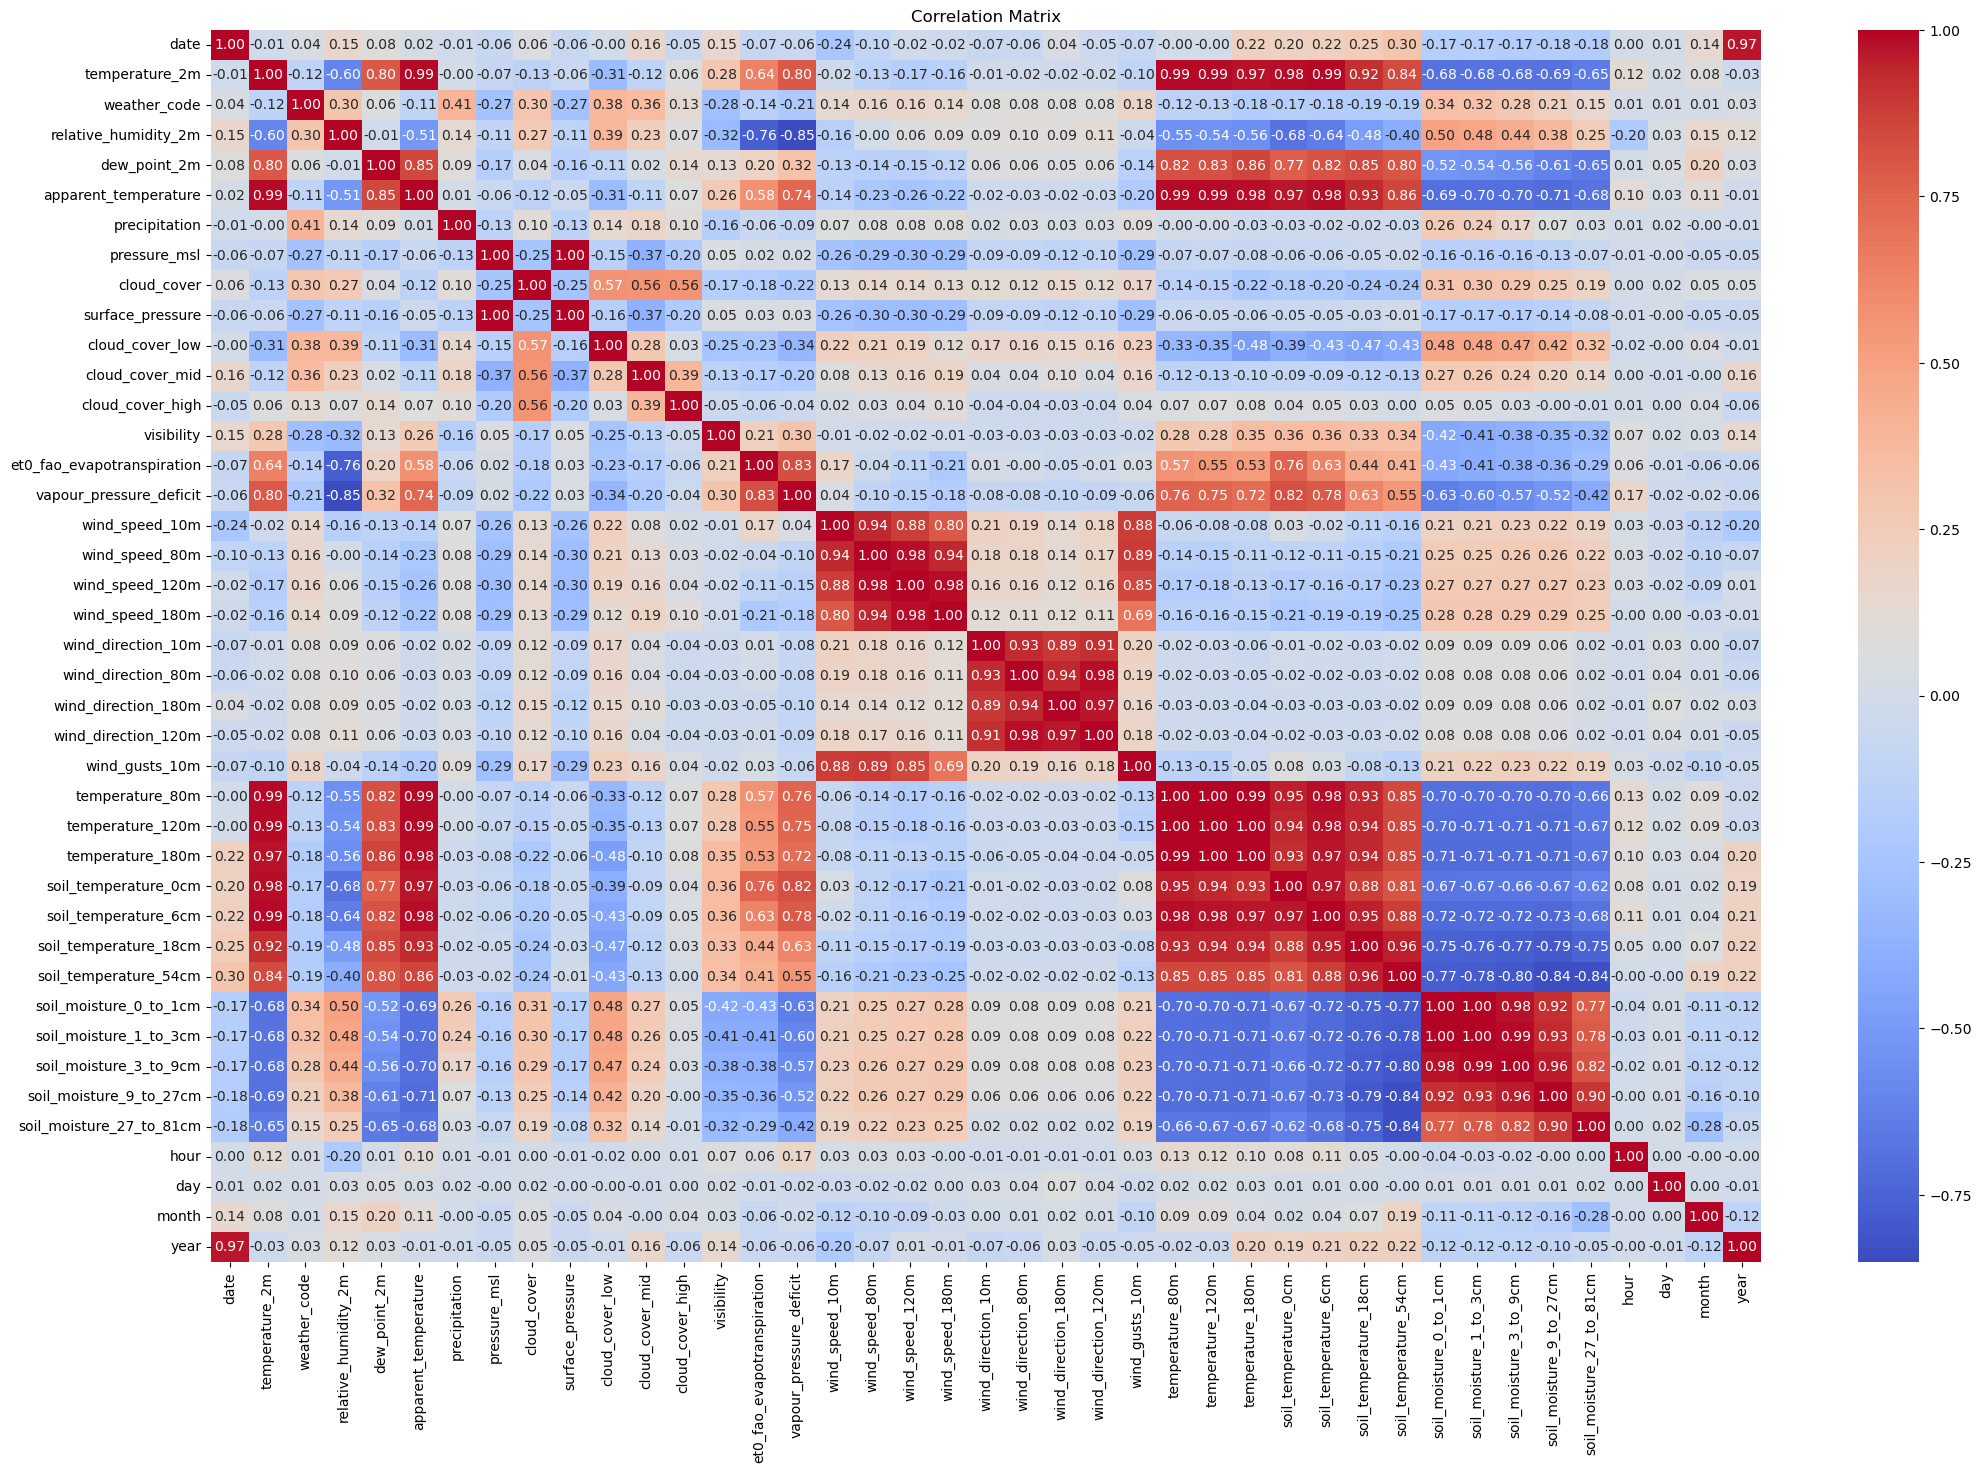

In [18]:
# PLOT - Correlation Matrix 
plt.figure(figsize=(25, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [19]:
corr_pairs = corr.unstack()

corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

top_10_corr = corr_pairs.abs().sort_values(ascending=False).head(10)

print(top_10_corr)

surface_pressure        pressure_msl              0.999910
pressure_msl            surface_pressure          0.999910
temperature_120m        temperature_80m           0.998984
temperature_80m         temperature_120m          0.998984
temperature_120m        temperature_180m          0.998196
temperature_180m        temperature_120m          0.998196
soil_moisture_0_to_1cm  soil_moisture_1_to_3cm    0.996528
soil_moisture_1_to_3cm  soil_moisture_0_to_1cm    0.996528
temperature_180m        temperature_80m           0.993830
temperature_80m         temperature_180m          0.993830
dtype: float64


In [20]:
#weather_code correlation with other columns descencing
weather_code_corr = corr["weather_code"].sort_values(ascending=False)

print(weather_code_corr)

weather_code                  1.000000
precipitation                 0.406205
cloud_cover_low               0.379636
cloud_cover_mid               0.358493
soil_moisture_0_to_1cm        0.340401
soil_moisture_1_to_3cm        0.324320
relative_humidity_2m          0.298888
cloud_cover                   0.297106
soil_moisture_3_to_9cm        0.282866
soil_moisture_9_to_27cm       0.212243
wind_gusts_10m                0.175712
wind_speed_120m               0.162848
wind_speed_80m                0.160033
soil_moisture_27_to_81cm      0.148671
wind_speed_10m                0.142022
wind_speed_180m               0.139808
cloud_cover_high              0.129717
wind_direction_120m           0.084211
wind_direction_80m            0.083568
wind_direction_10m            0.083288
wind_direction_180m           0.079495
dew_point_2m                  0.061646
date                          0.036820
year                          0.033464
day                           0.013496
month                    

In [21]:
####################################################################################################
# National Centers for Environmental Information
# https://www.nodc.noaa.gov/archive/arc0021/0002199/1.1/data/0-data/HTML/WMO-CODE/WMO4677.HTM
####################################################################################################

In [22]:
############################################
# Snow Weather codes used
############################################
# 71	Continuous fall of snowflakes
# 73	Continuous fall of snowflakes
# 75	Continuous fall of snowflakes
# 77	Snow grains (with or without fog)
# 85	Snow shower(s), slight
# 86	Snow shower(s), moderate or heavy

In [23]:
df["snow"] = df["weather_code"].isin([71,73,75,77,85,86]).astype(int)

In [24]:
############################################
# Rain Weather codes used
############################################
# 61	Rain, not freezing, continuous
# 63	Rain, not freezing, continuous
# 65	Rain, not freezing, continuous
# 80	Rain shower(s), slight
# 81	Rain shower(s), moderate or heavy
# 82	Rain shower(s), violent

In [25]:
df['rain'] = df['weather_code'].isin([61, 63, 65, 80, 81, 82]).astype(int)

In [26]:
#####################################################
# Hail Weather codes used
#####################################################
# 96	Thunderstorm, slight or moderate, with hail 
# 99	Thunderstorm, heavy, with hail* 

In [27]:
df['hail'] = df['weather_code'].isin([96, 99]).astype(int)

In [28]:
# 335 snow fields
df[df['snow'] == 1]

,date,temperature_2m,weather_code,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,pressure_msl,cloud_cover,surface_pressure,...,soil_moisture_3_to_9cm,soil_moisture_9_to_27cm,soil_moisture_27_to_81cm,hour,day,month,year,snow,rain,hail
46090,2021-04-05 10:00:00+00:00,3.2085,85.0,94.0,2.335697,-1.838803,1.7,997.8,100.0,993.12585,...,NaN,NaN,NaN,10,5,4,2021,1,0,0
46092,2021-04-05 12:00:00+00:00,2.9085,85.0,71.0,-1.834711,-2.675482,0.5,999.4,100.0,994.71330,...,NaN,NaN,NaN,12,5,4,2021,1,0,0
46115,2021-04-06 11:00:00+00:00,5.4085,85.0,45.0,-5.588726,-0.703162,0.2,1004.5,100.0,999.83170,...,NaN,NaN,NaN,11,6,4,2021,1,0,0
46856,2021-05-07 08:00:00+00:00,2.3085,73.0,98.0,2.024926,-1.525326,2.3,1007.0,100.0,1002.26764,...,NaN,NaN,NaN,8,7,5,2021,1,0,0
46857,2021-05-07 09:00:00+00:00,2.3085,73.0,98.0,2.024926,-1.275153,1.5,1008.2,100.0,1003.46204,...,NaN,NaN,NaN,9,7,5,2021,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77887,2024-11-20 07:00:00+00:00,1.7955,85.0,86.0,-0.297076,-2.582336,0.2,994.0,100.0,989.32007,...,0.339,0.350,0.321,7,20,11,2024,1,0,0
77930,2024-11-22 02:00:00+00:00,-0.3045,85.0,92.0,-1.446018,-3.808434,0.0,992.7,100.0,987.99020,...,0.321,0.330,0.333,2,22,11,2024,1,0,0
77931,2024-11-22 03:00:00+00:00,0.0955,71.0,90.0,-1.349868,-3.454731,0.0,992.9,93.0,988.19604,...,0.323,0.331,0.335,3,22,11,2024,1,0,0
77958,2024-11-23 06:00:00+00:00,0.3455,85.0,86.0,-1.722468,-3.791923,0.1,1016.2,52.0,1011.39014,...,0.319,0.326,0.336,6,23,11,2024,1,0,0


In [29]:
# 2628 Rain fields
df[df['rain'] == 1]

,date,temperature_2m,weather_code,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,pressure_msl,cloud_cover,surface_pressure,...,soil_moisture_3_to_9cm,soil_moisture_9_to_27cm,soil_moisture_27_to_81cm,hour,day,month,year,snow,rain,hail
45872,2021-03-27 08:00:00+00:00,8.708500,80.0,80.0,5.449738,3.379461,1.3,1012.4,100.0,1007.75000,...,NaN,NaN,NaN,8,27,3,2021,0,1,0
46089,2021-04-05 09:00:00+00:00,5.308500,61.0,90.0,3.800680,0.276482,1.4,996.7,100.0,992.06610,...,NaN,NaN,NaN,9,5,4,2021,0,1,0
46227,2021-04-11 03:00:00+00:00,6.408500,61.0,96.0,5.816914,2.979977,1.8,1011.6,100.0,1006.91540,...,NaN,NaN,NaN,3,11,4,2021,0,1,0
46241,2021-04-11 17:00:00+00:00,14.908501,80.0,74.0,10.314689,13.079010,1.7,1008.4,100.0,1003.86750,...,NaN,NaN,NaN,17,11,4,2021,0,1,0
46410,2021-04-18 18:00:00+00:00,10.108500,80.0,81.0,6.994800,8.154996,1.4,1019.5,100.0,1014.84030,...,NaN,NaN,NaN,18,18,4,2021,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78689,2024-12-23 17:00:00+00:00,5.195500,80.0,83.0,2.543715,1.606865,0.0,1007.4,100.0,1002.71450,...,0.339,0.345,0.361,17,23,12,2024,0,1,0
78690,2024-12-23 18:00:00+00:00,5.245500,61.0,84.0,2.761455,1.506381,0.0,1008.7,100.0,1004.00934,...,0.338,0.345,0.361,18,23,12,2024,0,1,0
78692,2024-12-23 20:00:00+00:00,4.945500,80.0,81.0,1.956764,1.371357,0.0,1010.3,100.0,1005.59686,...,0.337,0.344,0.362,20,23,12,2024,0,1,0
78693,2024-12-23 21:00:00+00:00,4.895500,80.0,84.0,2.418419,1.300309,0.0,1011.6,97.0,1006.88983,...,0.337,0.344,0.362,21,23,12,2024,0,1,0


In [30]:
# 12 Hail fields
df[df['hail'] == 1]

,date,temperature_2m,weather_code,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,pressure_msl,cloud_cover,surface_pressure,...,soil_moisture_3_to_9cm,soil_moisture_9_to_27cm,soil_moisture_27_to_81cm,hour,day,month,year,snow,rain,hail
63471,2023-03-30 15:00:00+00:00,13.695499,96.0,68.0,7.895231,11.127240,14.100000,1004.2,100.0,999.66760,...,0.347,0.319,0.337,15,30,3,2023,0,0,1
65494,2023-06-22 22:00:00+00:00,19.145500,96.0,85.0,16.563148,20.826006,2.200000,1016.5,100.0,1011.99740,...,0.321,0.283,0.301,22,22,6,2023,0,0,1
65509,2023-06-23 13:00:00+00:00,17.445500,96.0,93.0,16.301016,17.784435,10.100000,1016.7,100.0,1012.17017,...,0.414,0.349,0.304,13,23,6,2023,0,0,1
65583,2023-06-26 15:00:00+00:00,21.945500,96.0,81.0,18.535765,23.367462,0.500000,1013.1,100.0,1008.65480,...,0.331,0.291,0.309,15,26,6,2023,0,0,1
65608,2023-06-27 16:00:00+00:00,16.045500,96.0,74.0,11.411467,14.355097,3.400000,1015.0,100.0,1010.45593,...,0.324,0.300,0.308,16,27,6,2023,0,0,1
66258,2023-07-24 18:00:00+00:00,19.495500,96.0,89.0,17.633713,21.169570,1.200000,1001.0,100.0,996.57135,...,0.279,0.237,0.285,18,24,7,2023,0,0,1
66372,2023-07-29 12:00:00+00:00,21.195500,96.0,84.0,18.383858,22.700733,13.000000,1006.4,100.0,1001.97296,...,0.291,0.287,0.283,12,29,7,2023,0,0,1
66769,2023-08-15 01:00:00+00:00,20.095499,96.0,91.0,18.579830,22.574602,2.800000,1015.7,100.0,1011.21520,...,0.376,0.291,0.303,1,15,8,2023,0,0,1
74396,2024-06-27 20:00:00+00:00,23.345499,96.0,80.0,19.699526,26.869808,5.400000,1009.3,100.0,1004.89233,...,0.244,0.264,0.300,20,27,6,2024,0,0,1
74445,2024-06-29 21:00:00+00:00,25.045500,99.0,57.0,15.934793,25.644302,0.100000,1009.5,100.0,1005.11664,...,0.235,0.261,0.297,21,29,6,2024,0,0,1


<Axes: xlabel='snow', ylabel='precipitation'>

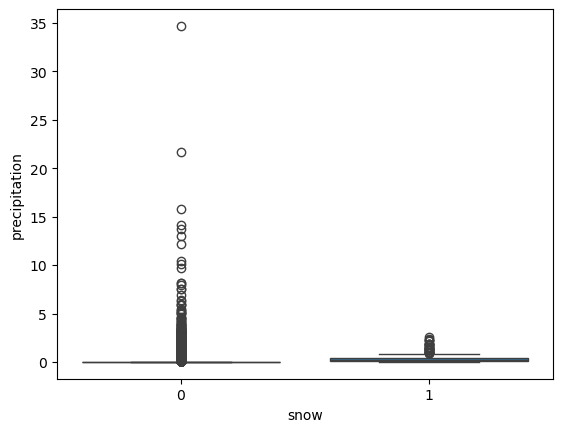

In [31]:
#Precipitations and Hail relation
sns.boxplot(x="snow", y="precipitation", data=df)

<Axes: xlabel='month'>

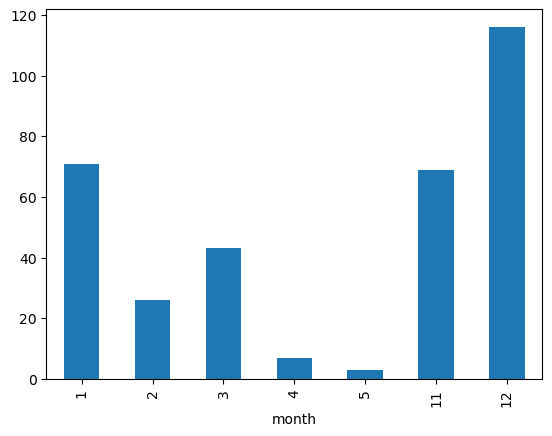

In [32]:
#Check snow Group by Months
df[df["snow"] == 1].groupby("month").size().plot(kind="bar")

<Axes: xlabel='month'>

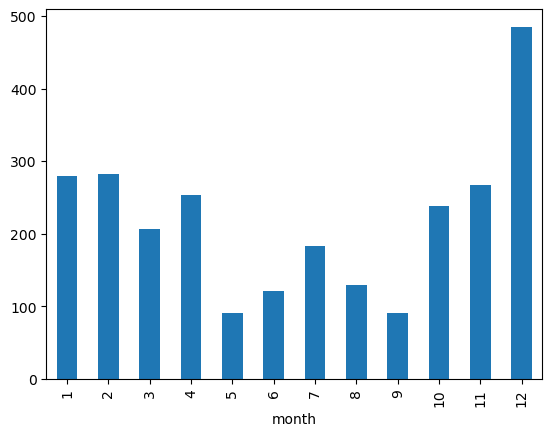

In [33]:
#Check Rain Group by Months
df[df["rain"] == 1].groupby("month").size().plot(kind="bar")

<Axes: xlabel='month'>

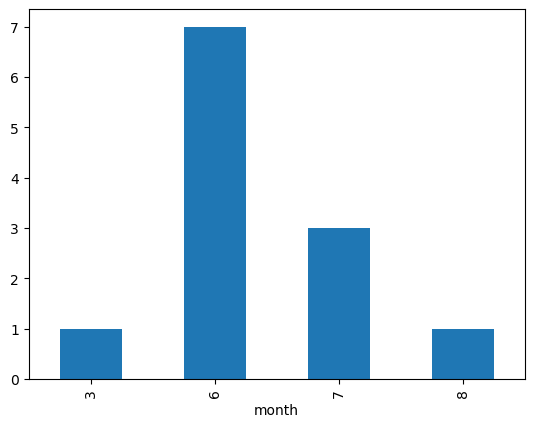

In [34]:
#Check Hail Group by Months
df[df["hail"] == 1].groupby("month").size().plot(kind="bar")

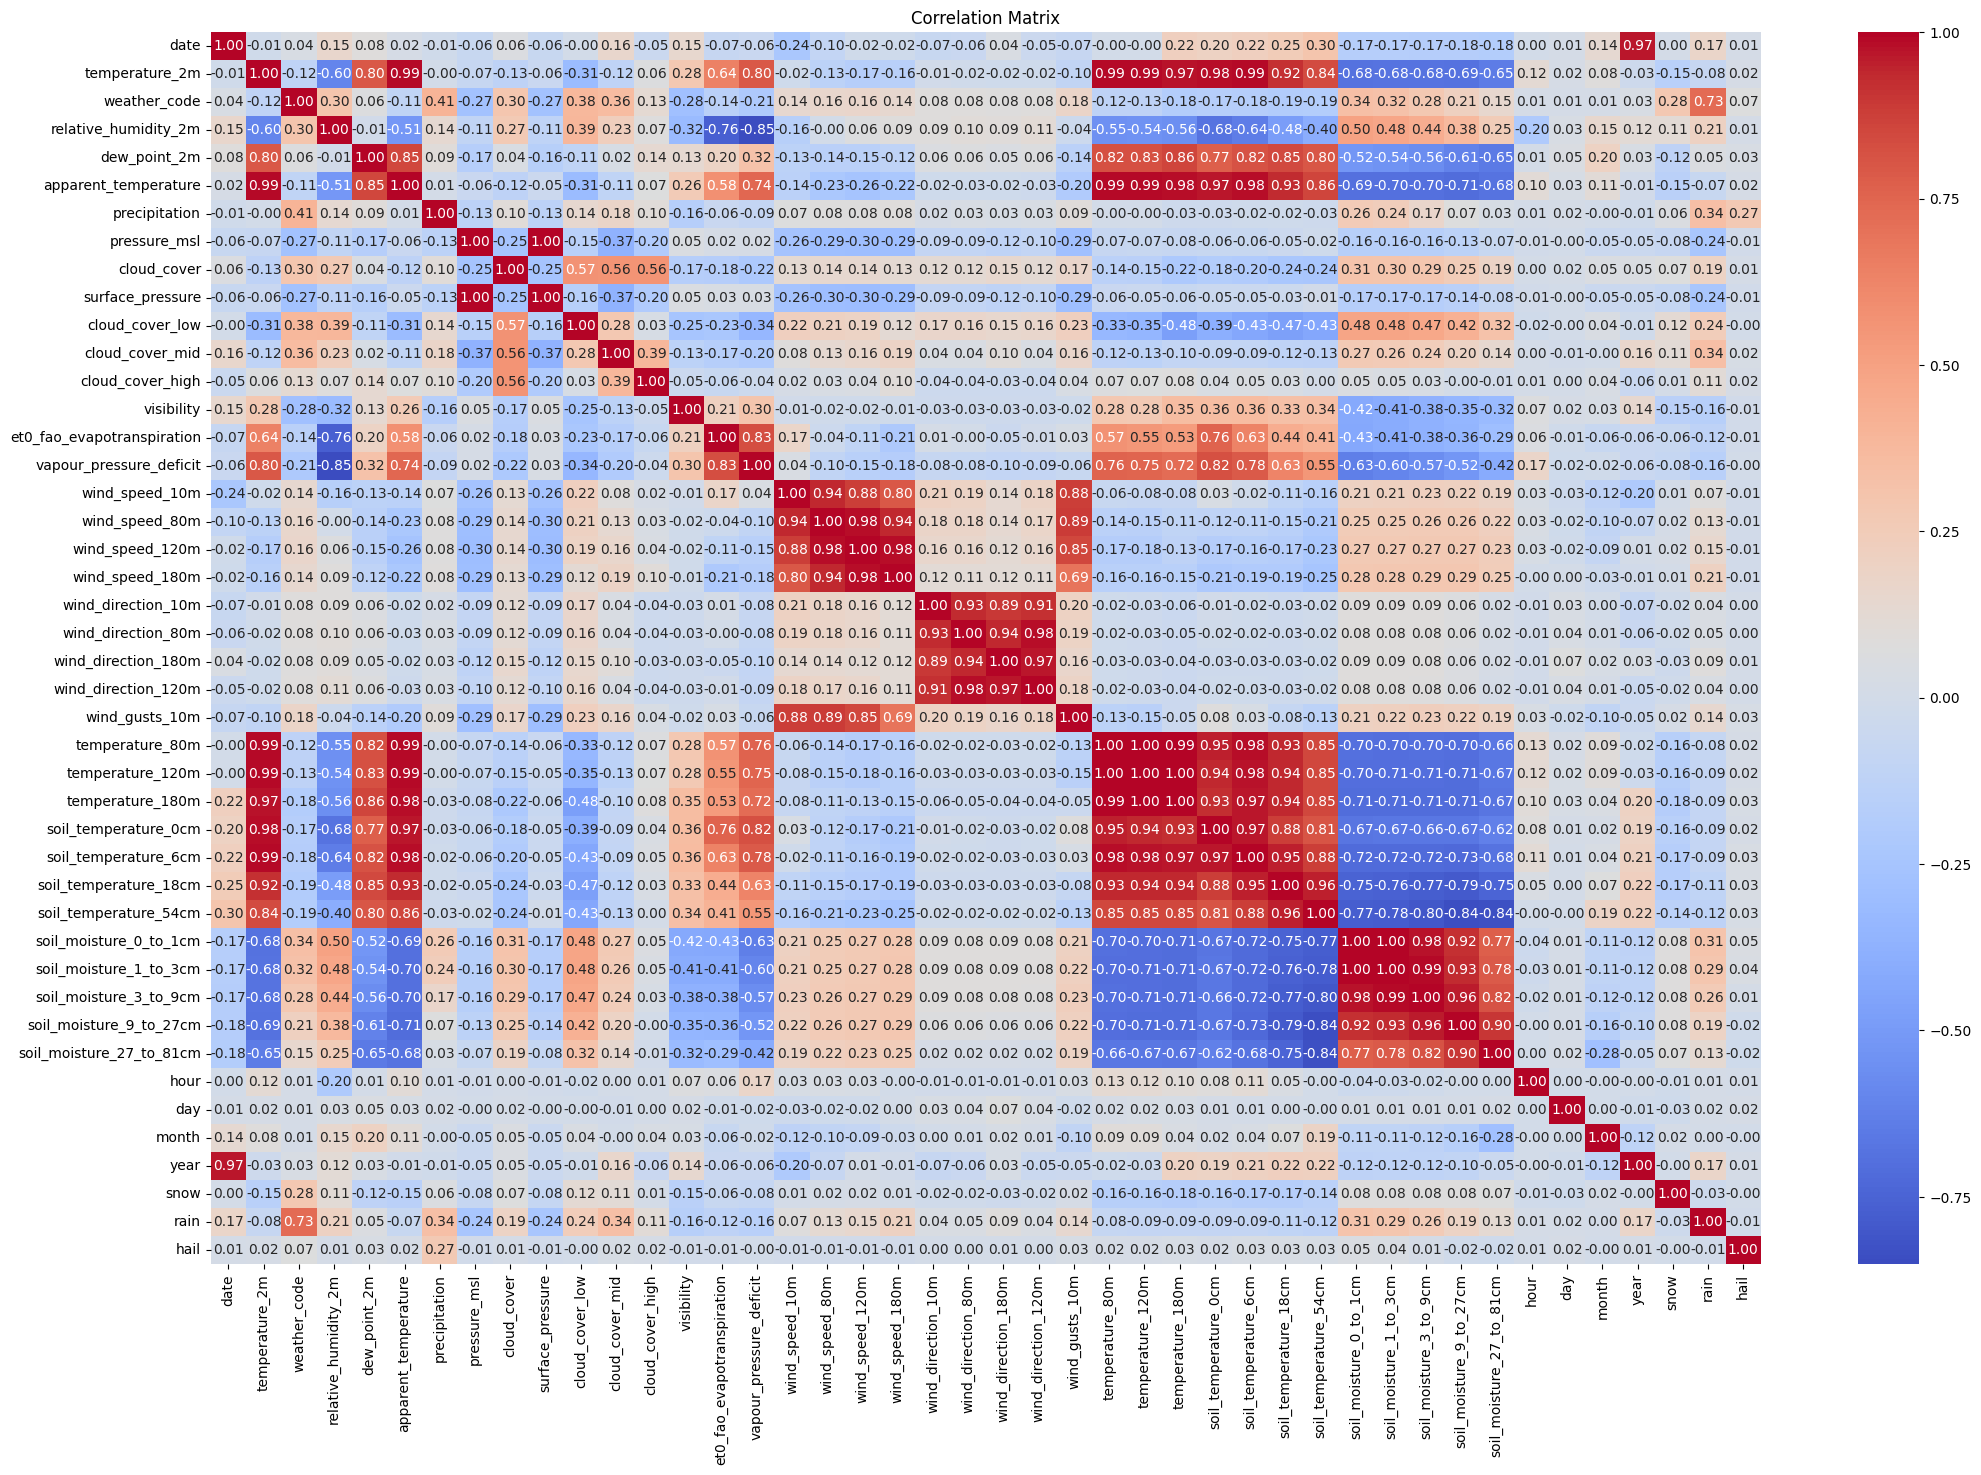

In [36]:
# PLOT - Correlation Matrix 
plt.figure(figsize=(25, 16))
sns.heatmap(corr_with_snow, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# will drop the following columns as they have less information 
# 28  temperature_180m            18640 non-null  float64            
# 29  soil_temperature_0cm        18640 non-null  float64            
# 30  soil_temperature_6cm        18640 non-null  float64            
# 31  soil_temperature_18cm       18640 non-null  float64            
# 32  soil_temperature_54cm       18640 non-null  float64            
# 33  soil_moisture_0_to_1cm      18640 non-null  float64            
# 34  soil_moisture_1_to_3cm      18640 non-null  float64            
# 35  soil_moisture_3_to_9cm      18640 non-null  float64            
# 36  soil_moisture_9_to_27cm     18640 non-null  float64            
# 37  soil_moisture_27_to_81cm    18640 non-null  float64        
#     wind_speed_180m               0.008742
#     wind_direction_180m          -0.028183

df = df.drop(columns=["temperature_180m", 
                      "soil_temperature_0cm",
                      "soil_temperature_6cm", 
                      "soil_temperature_18cm", 
                      "soil_temperature_54cm", 
                      "soil_moisture_0_to_1cm",
                      "soil_moisture_1_to_3cm",
                      "soil_moisture_3_to_9cm",
                      "soil_moisture_9_to_27cm",
                      "soil_moisture_27_to_81cm",
                      "wind_speed_180m", 
                      "wind_direction_180m"])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33117 entries, 45769 to 78887
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   date                        33117 non-null  datetime64[ns, UTC]
 1   temperature_2m              33117 non-null  float64            
 2   weather_code                33117 non-null  float64            
 3   relative_humidity_2m        33117 non-null  float64            
 4   dew_point_2m                33117 non-null  float64            
 5   apparent_temperature        33117 non-null  float64            
 6   precipitation               33117 non-null  float64            
 7   pressure_msl                33117 non-null  float64            
 8   cloud_cover                 33117 non-null  float64            
 9   surface_pressure            33117 non-null  float64            
 10  cloud_cover_low             33117 non-null  float64        

In [39]:
df.isnull().sum()

date                          0
temperature_2m                0
weather_code                  0
relative_humidity_2m          0
dew_point_2m                  0
apparent_temperature          0
precipitation                 0
pressure_msl                  0
cloud_cover                   0
surface_pressure              0
cloud_cover_low               0
cloud_cover_mid               0
cloud_cover_high              0
visibility                    0
et0_fao_evapotranspiration    0
vapour_pressure_deficit       0
wind_speed_10m                0
wind_speed_80m                0
wind_speed_120m               0
wind_direction_10m            0
wind_direction_80m            0
wind_direction_120m           0
wind_gusts_10m                0
temperature_80m               0
temperature_120m              0
hour                          0
day                           0
month                         0
year                          0
snow                          0
rain                          0
hail    

In [40]:
df = df.drop(columns=["date", "weather_code",])

In [ ]:
######################################################
# Export Clean DF to CSV 
# Used to export clean Dataset to be used in the App
######################################################

#df.to_csv("./openMeteoProject/Data/quebec_hourly_weather_2017_2024_after_EDA.csv", index=False)

## Prepare Data for Analysis

In [42]:
# X and y
X = df.drop(['rain', 'snow', 'hail'],axis=1)
y = df[['rain', 'snow', 'hail']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Scale data
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [43]:
y_train

,rain,snow,hail
47415,0,0,0
57253,0,0,0
57601,0,0,0
67226,0,0,0
64535,0,0,0
...,...,...,...
58134,0,0,0
51465,0,0,0
53777,0,0,0
63516,0,0,0


-----
### Model 1 - Random Forest Classifier
-----

In [ ]:
model_1 = MultiOutputClassifier(RandomForestClassifier())
model_1.fit(scaled_X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier())

In [45]:
# Prediction
y_pred = model_1.predict(scaled_X_test)

#y_proba = model.predict_proba(scaled_X_test)[:, 1]
y_proba = np.array(model_1.predict_proba(scaled_X_test))[:, 1]

In [46]:
y_pred

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [47]:
y_proba

array([[0.04, 0.96],
       [1.  , 0.  ],
       [1.  , 0.  ]])

----
### Evaluate Model 1 - Random Forest Classifier
----

In [48]:
from sklearn.metrics import classification_report

labels = ['rain', 'snow', 'hail']

for i, label in enumerate(labels):
    print(f"\nReport for {label.upper()}")
    print(classification_report(y_test[label], y_pred[:, i], digits=3))


Report for RAIN
              precision    recall  f1-score   support

           0      0.977     0.997     0.987      6083
           1      0.957     0.739     0.834       541

    accuracy                          0.976      6624
   macro avg      0.967     0.868     0.911      6624
weighted avg      0.976     0.976     0.975      6624


Report for SNOW
              precision    recall  f1-score   support

           0      0.997     0.998     0.997      6564
           1      0.740     0.617     0.673        60

    accuracy                          0.995      6624
   macro avg      0.868     0.807     0.835      6624
weighted avg      0.994     0.995     0.994      6624


Report for HAIL
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      6624

    accuracy                          1.000      6624
   macro avg      1.000     1.000     1.000      6624
weighted avg      1.000     1.000     1.000      6624



----
### RAIN
----
Value 0 (No Rain)
- Precision = 97.7% of the time when the model predicted No Rain, it was correct.

- Recall = 99.7% of the No Rain cases were correctly identified.

Value 1 (Rain)
- Precision = 95.5% of the time when the model predicted Rain, it was correct.

- Recall = 73.9% of the Rain cases were correctly identified.

Accuracy
- The model correctly classified 97.6% of the cases.

----
### SNOW
----
Value 0 (No Snow)
- Precision = 99.7% of the time when the model predicted No Snow, it was correct.

- Recall = 99.8% of the No Snow cases were correctly identified.

Value 1 (Snow)
- Precision = 77.6% of the time when the model predicted Snow, it was correct.

- Recall = 63.3% of the Snow cases were correctly identified.

Accuracy
- The model correctly classified 99.5% of the cases for snow prediction.

----
### HAIL
----
Accuracy 100%
- The model correctly classified all test samples as No Hail, but no real hail cases to evaluate!!

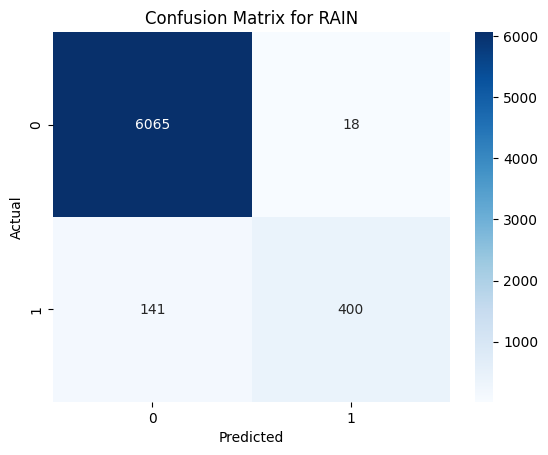

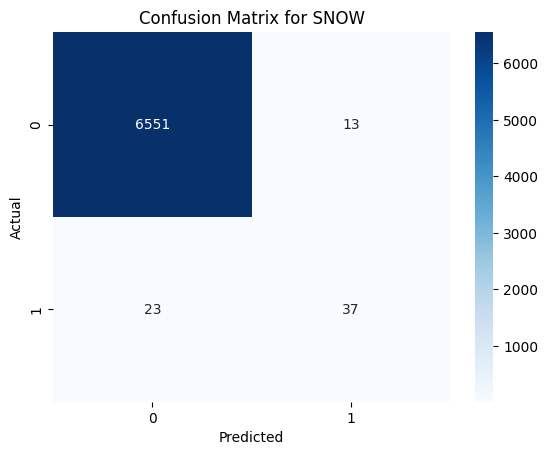

C:\Users\szmaj\.conda\envs\tf_env\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


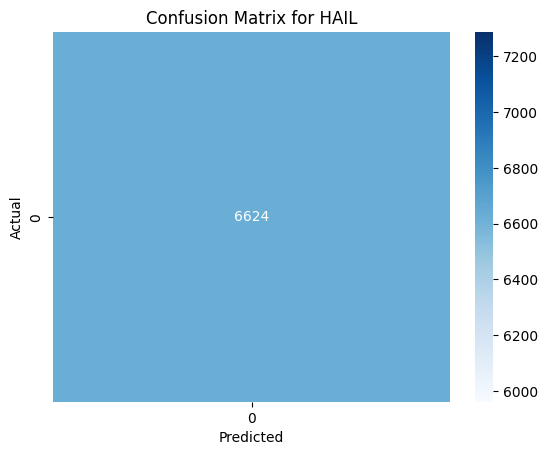

In [ ]:
for i, label in enumerate(labels):
    cm = confusion_matrix(y_test[label], y_pred[:, i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {label.upper()}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

-------------------------------------------------------------------------------------
#### RAIN
-------------------------------------------------------------------------------------
####  6063 times - the model correctly predicted no rain when it wasn't real raining
#### 399 times  - the model correctly predicted rain when it was actually raining
#### 142 times it missed a rain event (predicted no rain, but it rained) 
#### 20 times it incorrectly predicted rain when there was no rain.

-------------------------------------------------------------------------------------
#### SNOW
-------------------------------------------------------------------------------------
#### 6554 times : The model correctly predicted no snow when there was no snow.
#### 10 times   : The model incorrectly predicted snow when there was no snow.
#### 21 times   : The model missed snow events — it predicted no snow when there was snow.
#### 39 times   : The model correctly predicted snow when there actually was snow.

-------------------------------------------------------------------------------------
#### HAIL 
-------------------------------------------------------------------------------------
#### No positives cases in test samples to evaluate!!
#### Will focus in Snow and Rain

-----
### Model 2 - SVM - Support Vector Machines
-----

In [ ]:
svm = SVC()
multi_svm = MultiOutputClassifier(svm)

param_grid = {
    'estimator__C': [0.01, 0.1, 1],
    'estimator__kernel': ['linear', 'rbf']
}

model_2 = GridSearchCV(multi_svm, param_grid, cv=5)
model_2.fit(scaled_X_train, y_train)  

print("Best Params:", model_2.best_params_)

Best Params: {'estimator__C': 1, 'estimator__kernel': 'rbf'}


In [52]:
for params, model in zip(model_2.cv_results_['params'], model_2.cv_results_['mean_test_score']):
    print(f"Parameters: {params} - Accuracy: {model:.4f}")

# Best Model Estimator
best_svm = model_2.best_estimator_
best_svm

Parameters: {'estimator__C': 0.01, 'estimator__kernel': 'linear'} - Accuracy: 0.9282
Parameters: {'estimator__C': 0.01, 'estimator__kernel': 'rbf'} - Accuracy: 0.9106
Parameters: {'estimator__C': 0.1, 'estimator__kernel': 'linear'} - Accuracy: 0.9308
Parameters: {'estimator__C': 0.1, 'estimator__kernel': 'rbf'} - Accuracy: 0.9337
Parameters: {'estimator__C': 1, 'estimator__kernel': 'linear'} - Accuracy: 0.9325
Parameters: {'estimator__C': 1, 'estimator__kernel': 'rbf'} - Accuracy: 0.9491


MultiOutputClassifier(estimator=SVC(C=1))

In [53]:
y_pred_2 = best_svm.predict(scaled_X_test)

----
### Evaluate Model 2
----

In [ ]:
labels = ['rain', 'snow', 'hail']

for i, label in enumerate(labels):
    print(f"\nReport for {label.upper()}")
    print(classification_report(y_test[label], y_pred_2[:, i], digits=3))


Report for RAIN
              precision    recall  f1-score   support

           0      0.956     0.996     0.976      6083
           1      0.913     0.488     0.636       541

    accuracy                          0.954      6624
   macro avg      0.935     0.742     0.806      6624
weighted avg      0.953     0.954     0.948      6624


Report for SNOW
              precision    recall  f1-score   support

           0      0.995     0.998     0.997      6564
           1      0.703     0.433     0.536        60

    accuracy                          0.993      6624
   macro avg      0.849     0.716     0.766      6624
weighted avg      0.992     0.993     0.992      6624


Report for HAIL
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      6624

    accuracy                          1.000      6624
   macro avg      1.000     1.000     1.000      6624
weighted avg      1.000     1.000     1.000      6624



----
### RAIN
----
Value 0 (No Rain)
- Precision = 95.6% of the time when the model predicted No Rain, it was correct.

- Recall = 99.6% of the No Rain cases were correctly identified.

Value 1 (Rain)
- Precision = 91.3% of the time when the model predicted Rain, it was correct.

- Recall = 48.8% of the Rain cases were correctly identified.

Accuracy
- The model correctly classified 95.4% of the cases for rain prediction

----
### SNOW
----
Value 0 (No Snow)
- Precision = 99.5% of the time when the model predicted No Snow, it was correct.

- Recall = 99.8% of the No Snow cases were correctly identified.

Value 1 (Snow)
- Precision = 70.3% of the time when the model predicted Snow, it was correct.

- Recall = 43.3% of the Snow cases were correctly identified.

Accuracy
- The model correctly classified 99.3% of the cases for snow prediction.

----
### HAIL
----
Accuracy 100%
- The model correctly classified all test samples as No Hail, but no real hail cases to evaluate!!

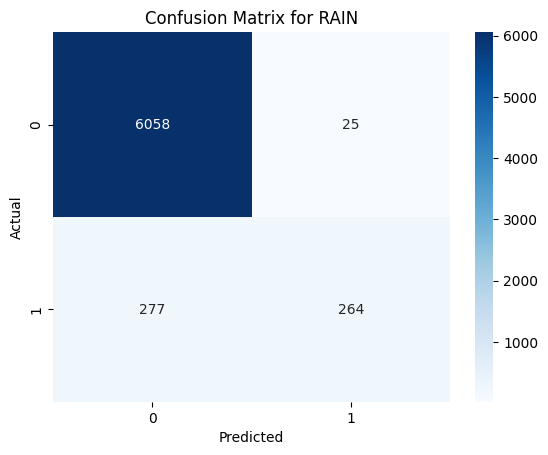

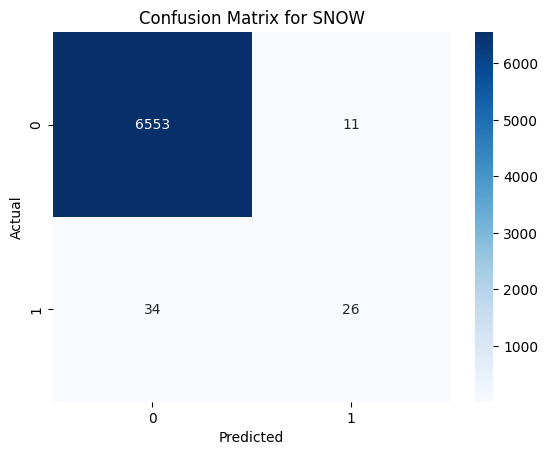

C:\Users\szmaj\.conda\envs\tf_env\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


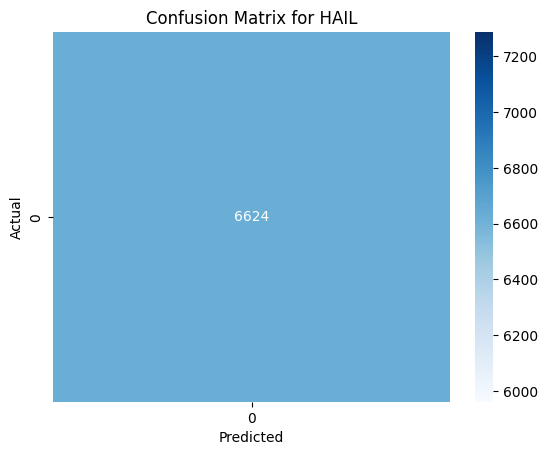

In [55]:
for i, label in enumerate(labels):
    cm = confusion_matrix(y_test[label], y_pred_2[:, i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {label.upper()}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

----
### Conclusion
----
I will proceed with the first model Random Forest Classifier, 
as it demonstrates better recall performance in identifying both rain and snow cases compared to the second model.


## Export Model 

In [ ]:
data = {
    "model": model_1,
    "scaler": scaled_X_test
}
with open('model_saved.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
df_current_weather = pd.read_csv('./openMeteoProject/Data/quebec_current_weather.csv')

In [66]:
df_current_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        1 non-null      object 
 1   temperature_2m              1 non-null      float64
 2   weather_code                1 non-null      float64
 3   relative_humidity_2m        1 non-null      float64
 4   dew_point_2m                1 non-null      float64
 5   apparent_temperature        1 non-null      float64
 6   precipitation               1 non-null      float64
 7   pressure_msl                1 non-null      float64
 8   cloud_cover                 1 non-null      float64
 9   surface_pressure            1 non-null      float64
 10  cloud_cover_low             1 non-null      float64
 11  cloud_cover_mid             1 non-null      float64
 12  cloud_cover_high            1 non-null      float64
 13  visibility                  1 non-null 

In [67]:
# Date Format
df_current_weather['date'] = pd.to_datetime(df_current_weather['date'])
df_current_weather['hour'] = df_current_weather['date'].dt.hour
df_current_weather['day'] = df_current_weather['date'].dt.day
df_current_weather['month'] = df_current_weather['date'].dt.month
df_current_weather['year'] = df_current_weather['date'].dt.year

In [70]:
df_current_weather = df_current_weather.drop(columns=["date", "weather_code",])

In [71]:
df_current_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   temperature_2m              1 non-null      float64
 1   relative_humidity_2m        1 non-null      float64
 2   dew_point_2m                1 non-null      float64
 3   apparent_temperature        1 non-null      float64
 4   precipitation               1 non-null      float64
 5   pressure_msl                1 non-null      float64
 6   cloud_cover                 1 non-null      float64
 7   surface_pressure            1 non-null      float64
 8   cloud_cover_low             1 non-null      float64
 9   cloud_cover_mid             1 non-null      float64
 10  cloud_cover_high            1 non-null      float64
 11  visibility                  1 non-null      float64
 12  et0_fao_evapotranspiration  1 non-null      float64
 13  vapour_pressure_deficit     1 non-null 

In [76]:
scaled_to_predict = scaler.transform(df_current_weather)

In [ ]:
# Open saved data (model + encoders) to test if prediction works

with open('model_saved.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
#scaled_data = data["scaler"]


In [ ]:
y_pred = regressor_loaded.predict(scaled_to_predict)
y_pred

array([[0, 0, 0]])

In [89]:
print("Rain")
print("YES" if y_pred[0][0] == 1 else "NO") 

Rain
NO


In [90]:
print("Snow")
print("YES" if y_pred[0][1] == 1 else "NO") 

Snow
NO


In [91]:
print("Hail")
print("YES" if y_pred[0][2] == 1 else "NO") 

Hail
NO


## The End!